# Results Analysis

We arrive now to the analysis of the results generated during the detection phase. The objective is to extract some statistics regarding the precision of of said ring detection. These statistics will shown in the form of tables and will be saved in images for future use.

[Source](https://matplotlib.org/matplotblog/posts/how-to-create-custom-tables/)

In [27]:
import json, math
import numpy as np
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import pyplot as plt

In [28]:
RESULTS_PATH = "../results/results_2023-04-28 20:38:32.563698.json"

The first step is to extract the data from the results json in the directory. That is relatively easy to do, since json can be converted easily to dictionaries, which are easy to manage and iterate over

In [29]:
f = open(f"{RESULTS_PATH}")
results = json.load(f)

The stats we will study will be the following:

In [30]:
''' stats structure
{
    tot_avg_error: float,
    tot_avg_center_error: float,
    tot_avg_radius_error: float,
    clean:
    {
        avg_error: float,
        avg_center_error: float,
        avg_radius_error: float
    }
    extends:
    {
        avg_error: float,
        avg_center_error: float,
        avg_radius_error: float,
        25%:
        {
            over:
            {
                avg_error: float,
                avg_center_error: float,
                avg_radius_error: float,
            }
            under:
            {
                avg_error: float,
                avg_center_error: float,
                avg_radius_error: float,
            }
        }
    }
    collides:
    {
        avg_error: float,
        avg_center_error: float,
        avg_radius_error: float,
        collission_type:
        {
            overlaps:
            {
                avg_error: float,
                avg_center_error: float,
                avg_radius_error: float,
            },
            contains:
            {
                avg_error: float,
                avg_center_error: float,
                avg_radius_error: float,
            }
        }
    }
}
'''
''' results structure
{
   set_type: 
   {
        filename:
        {
            circs_num = int,
            circunferences:
            {
                cir_no:
                {
                    points: [],
                    center: [],
                    radius: []
                }
            }
            noise: [],
            pairs: [],
            predicted_centers: [],
            predicted_radii: [],
            centers_error: float,
            radii_error: float,
            tot_error: float
        }
   }  
}
'''

' results structure\n{\n   set_type: \n   {\n        filename:\n        {\n            circs_num = int,\n            circunferences:\n            {\n                cir_no:\n                {\n                    points: [],\n                    center: [],\n                    radius: []\n                }\n            }\n            noise: [],\n            pairs: [],\n            predicted_centers: [],\n            predicted_radii: [],\n            centers_error: float,\n            radii_error: float,\n            tot_error: float\n        }\n   }  \n}\n'

In [31]:
def get_extension_perc_stats(results):
    extension_perc_stats = {"over": {}, "under": {}}

    avg_error_over_25_ls = []
    avg_center_error_over_25_ls = []
    avg_radius_error_over_25_ls = []

    avg_error_under_25_ls = []
    avg_center_error_under_25_ls = []
    avg_radius_error_under_25_ls = []

    for filename in results["extends"].keys():
        if any(results["extends"][filename]["circunferences"][str(circ_no+1)]["center"][0] < results["extends"][filename]["circunferences"][str(circ_no+1)]["radius"]/2 or
               100 - results["extends"][filename]["circunferences"][str(circ_no+1)]["center"][0] < results["extends"][filename]["circunferences"][str(circ_no+1)]["radius"]/2  or
               results["extends"][filename]["circunferences"][str(circ_no+1)]["center"][1] < results["extends"][filename]["circunferences"][str(circ_no+1)]["radius"]/2  or
               100 -results["extends"][filename]["circunferences"][str(circ_no+1)]["center"][1] < results["extends"][filename]["circunferences"][str(circ_no+1)]["radius"]/2 
                for circ_no in range(results["extends"][filename]["circs_num"])):
            avg_error_over_25_ls.append(results["extends"][filename]["tot_error"])
            avg_center_error_over_25_ls.append(results["extends"][filename]["centers_error"])
            avg_radius_error_over_25_ls.append(results["extends"][filename]["radii_error"])

        else:
            avg_error_under_25_ls.append(results["extends"][filename]["tot_error"])
            avg_center_error_under_25_ls.append(results["extends"][filename]["centers_error"])
            avg_radius_error_under_25_ls.append(results["extends"][filename]["radii_error"])
            
    extension_perc_stats["over"]["avg_error_over_25"] = np.mean(avg_error_over_25_ls)
    extension_perc_stats["over"]["avg_center_error_over_25"] = np.mean(avg_center_error_over_25_ls)
    extension_perc_stats["over"]["avg_radius_error_over_25"] = np.mean(avg_radius_error_over_25_ls)

    extension_perc_stats["under"]["avg_error_under_25"] = np.mean(avg_error_under_25_ls)
    extension_perc_stats["under"]["avg_center_error_under_25"] = np.mean(avg_center_error_under_25_ls)
    extension_perc_stats["under"]["avg_radius_error_under_25"] = np.mean(avg_radius_error_under_25_ls)

    return extension_perc_stats

In [32]:
def get_collission_type_stats(results):
    collission_type_stats = {"overlaps": {}, "contains": {}}

    avg_error_overlaps_ls = []
    avg_center_error_overlaps_ls = []
    avg_radius_error_overlaps_ls = []

    avg_error_contains_ls = []
    avg_center_error_contains_ls = []
    avg_radius_error_contains_ls = []

    for filename in results["collides"].keys():
        circunferences = results["collides"][filename]["circunferences"]
        if any(any(np.sqrt((circunferences[str(i+1)]["center"][0]-circunferences[str(j+1)]["center"][0])**2 + (circunferences[str(i+1)]["center"][1]-circunferences[str(j+1)]["center"][1])**2) < max(circunferences[str(i+1)]["radius"], circunferences[str(j+1)]["radius"]) 
                   for i in range(j+1, len(circunferences))) for j in range(len(circunferences))):
            avg_error_contains_ls.append(results["collides"][filename]["tot_error"])
            avg_center_error_contains_ls.append(results["collides"][filename]["centers_error"])
            avg_radius_error_contains_ls.append(results["collides"][filename]["radii_error"])

        else:
            avg_error_overlaps_ls.append(results["collides"][filename]["tot_error"])
            avg_center_error_overlaps_ls.append(results["collides"][filename]["centers_error"])
            avg_radius_error_overlaps_ls.append(results["collides"][filename]["radii_error"])
            
    collission_type_stats["overlaps"]["avg_error_overlaps"] = np.mean(avg_error_overlaps_ls)
    collission_type_stats["overlaps"]["avg_center_error_overlaps"] = np.mean(avg_center_error_overlaps_ls)
    collission_type_stats["overlaps"]["avg_radius_error_overlaps"] = np.mean(avg_radius_error_overlaps_ls)

    collission_type_stats["contains"]["avg_error_contains"] = np.mean(avg_error_contains_ls)
    collission_type_stats["contains"]["avg_center_error_contains"] = np.mean(avg_center_error_contains_ls)
    collission_type_stats["contains"]["avg_radius_error_contains"] = np.mean(avg_radius_error_contains_ls)

    return collission_type_stats

In [33]:
def extract_stats(results):
    stats = {}
    tot_avg_error_ls = []
    tot_avg_center_error_ls = []
    tot_avg_radius_error_ls = []

    for set_type in results.keys():
        stats[set_type] = {}
        avg_error_ls = []
        avg_center_error_ls = []
        avg_radius_error_ls = []

        match set_type:
            case "extends": stats[set_type]["25%"] = get_extension_perc_stats(results)
            case "collides": stats[set_type]["collission_type"] = get_collission_type_stats(results)

        for filename in results[set_type].keys():
            tot_avg_error_ls.append(results[set_type][filename]["tot_error"])
            tot_avg_center_error_ls.append(results[set_type][filename]["centers_error"])
            tot_avg_radius_error_ls.append(results[set_type][filename]["radii_error"])

            avg_error_ls.append(results[set_type][filename]["tot_error"])
            avg_center_error_ls.append(results[set_type][filename]["centers_error"])
            avg_radius_error_ls.append(results[set_type][filename]["radii_error"])

        stats[set_type]["avg_error"] = np.mean(avg_error_ls)
        stats[set_type]["avg_center_error"] = np.mean(avg_center_error_ls)
        stats[set_type]["avg_radii_error"] = np.mean(avg_radius_error_ls)

    stats["tot_avg_error"] = np.mean(tot_avg_error_ls)
    stats["tot_avg_center_error"] = np.mean(tot_avg_center_error_ls)
    stats["tot_avg_radii_error"] = np.mean(tot_avg_radius_error_ls)
    
    return stats
    

# Stats visualization

Now its time to visualize the stats in the way of tables representing the accuracy of the detection. As we have done in previous steps we differentiate between:
- Clean Sets: Sets of points creating circunferences within the limits and not colliding with any other
- Extend Sets: These sets have 1 or more circunferences that extends over the limits in less or more percentage, alwways less than 50%, since the center is within the limits
- Collide Sets: In these cases, we need more than 1 circunference to be on the instance, and at least 2 of them overlapping in a certain way:
  - One Center inside another Circunference: We call this "containing"
  - No center inside another, but areas still overlap: We call this "overlapping" 

In [34]:
def general_table(stats):
    # General table
    fig, ax = plt.subplots(figsize=(7, 3))
    rows = 3   # Type of average
    cols = 5    # Type of set

    ax.set_ylim(-0.1, .8 + .0)
    ax.set_xlim(-0.25, cols + .9)

    data = [    
        {'title':"Total Accuracy", 'avg_clean_error': str(np.around((1-stats["clean"]["avg_error"])*100, decimals=2))+"%", 'avg_extends_error': str(np.around((1-stats["extends"]["avg_error"])*100, decimals=2))+"%", 'avg_collides_error': str(np.around((1-stats["collides"]["avg_error"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["tot_avg_error"])*100, decimals=2))+"%"},
        {'title':"Radius Accuracy", 'avg_clean_error': str(np.around((1-stats["clean"]["avg_radii_error"])*100, decimals=2))+"%", 'avg_extends_error': str(np.around((1-stats["extends"]["avg_radii_error"])*100, decimals=2))+"%", 'avg_collides_error': str(np.around((1-stats["collides"]["avg_radii_error"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["tot_avg_radii_error"])*100, decimals=2))+"%"},
        {'title':"Center Accuracy", 'avg_clean_error': str(np.around((1-stats["clean"]["avg_center_error"])*100, decimals=2))+"%", 'avg_extends_error': str(np.around((1-stats["extends"]["avg_center_error"])*100, decimals=2))+"%", 'avg_collides_error': str(np.around((1-stats["collides"]["avg_center_error"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["tot_avg_center_error"])*100, decimals=2))+"%"}
    ]

    for row in range(rows):
        d = data[row]

        ax.text(x=1.25, y=row/4, s=d['title'], va='center', ha='right', weight='bold')
        ax.text(x=2.45, y=row/4, s=d['avg_clean_error'], va='center', ha='right')
        ax.text(x=3.65, y=row/4, s=d['avg_extends_error'], va='center', ha='right')
        ax.text(x=4.75, y=row/4, s=d['avg_collides_error'], va='center', ha='right')
        ax.text(x=5.85, y=row/4, s=d['tot_avg_error'], va='center', ha='right')

        ax.text(1.25, 0.7, 'Error Type', weight='bold', va='center', ha='right')
        ax.text(2.45, 0.7, 'Clean Sets', weight='bold', va='center', ha='right')
        ax.text(3.65, 0.7, 'Extend Sets', weight='bold', va='center', ha='right')
        ax.text(4.75, 0.7, 'Collide Sets', weight='bold', va='center', ha='right')
        ax.text(5.85, 0.7, 'Total', weight='bold', va='center', ha='right')
    for row in range(rows):
        ax.plot(
            [cols/3 -.25, cols/3 - .25],
            [row/3 -.25, row/3 - .25]
        )
    ax.plot([-1, cols + 1], [0.65, 0.65], lw='.5', c='black')
    ax.axis('off')
    ax.set_title(
        'General Accuracy',
        loc='left',
        fontsize=18,
        weight='bold'
    )

In [35]:
def extends_table(stats):
    # Extends table
    fig, ax = plt.subplots(figsize=(7, 3))
    rows = 3   # Type of average
    cols = 4    # Type of set

    ax.set_ylim(-0.1, .8 + .0)
    ax.set_xlim(0.1, cols + .9)

    data = [    
        {'title':"Total Accuracy", 'avg_<25_error': str(np.around((1-stats["extends"]["25%"]["under"]["avg_error_under_25"])*100, decimals=2))+"%", 'avg_>25_error': str(np.around((1-stats["extends"]["25%"]["over"]["avg_error_over_25"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["extends"]["avg_error"])*100, decimals=2))+"%"},
        {'title':"Radius Accuracy", 'avg_<25_error': str(np.around((1-stats["extends"]["25%"]["under"]["avg_radius_error_under_25"])*100, decimals=2))+"%", 'avg_>25_error': str(np.around((1-stats["extends"]["25%"]["over"]["avg_radius_error_over_25"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["extends"]["avg_radii_error"])*100, decimals=2))+"%"},
        {'title':"Center Accuracy", 'avg_<25_error': str(np.around((1-stats["extends"]["25%"]["under"]["avg_center_error_under_25"])*100, decimals=2))+"%", 'avg_>25_error': str(np.around((1-stats["extends"]["25%"]["over"]["avg_center_error_over_25"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["extends"]["avg_center_error"])*100, decimals=2))+"%"}
    ]

    for row in range(rows):
        d = data[row]

        ax.text(x=1.25, y=row/4, s=d['title'], va='center', ha='right', weight='bold')
        ax.text(x=2.45, y=row/4, s=d['avg_<25_error'], va='center', ha='right')
        ax.text(x=3.65, y=row/4, s=d['avg_>25_error'], va='center', ha='right')
        ax.text(x=4.75, y=row/4, s=d['tot_avg_error'], va='center', ha='right')

        ax.text(1.25, 0.7, 'Error Type', weight='bold', va='center', ha='right')
        ax.text(2.45, 0.7, "<25% out Sets", weight='bold', va='center', ha='right')
        ax.text(3.65, 0.7, ">25% out Sets", weight='bold', va='center', ha='right')
        ax.text(4.75, 0.7, 'Total', weight='bold', va='center', ha='right')
    for row in range(rows):
        ax.plot(
            [cols/3 -.25, cols/3 - .25],
            [row/3 -.25, row/3 - .25]
        )
    ax.plot([-1, cols + 1], [0.65, 0.65], lw='.5', c='black')
    ax.axis('off')
    ax.set_title(
        'Accuracy based on Clippling percentage',
        loc='left',
        fontsize=18,
        weight='bold'
    )

In [36]:
def collides_table(stats):
    # Collides table
    fig, ax = plt.subplots(figsize=(7, 3))
    rows = 3   # Type of average
    cols = 4    # Type of set

    ax.set_ylim(-0.1, .8 + .0)
    ax.set_xlim(0.1, cols + .9)

    data = [    
        {'title':"Total Accuracy", 'avg_overlapping_error': str(np.around((1-stats["collides"]["collission_type"]["overlaps"]["avg_error_overlaps"])*100, decimals=2))+"%", 'avg_containing_error': str(np.around((1-stats["collides"]["collission_type"]["contains"]["avg_error_contains"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["collides"]["avg_error"])*100, decimals=2))+"%"},
        {'title':"Radius Accuracy", 'avg_overlapping_error': str(np.around((1-stats["collides"]["collission_type"]["overlaps"]["avg_radius_error_overlaps"])*100, decimals=2))+"%", 'avg_containing_error': str(np.around((1-stats["collides"]["collission_type"]["contains"]["avg_radius_error_contains"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["collides"]["avg_radii_error"])*100, decimals=2))+"%"},
        {'title':"Center Accuracy", 'avg_overlapping_error': str(np.around((1-stats["collides"]["collission_type"]["overlaps"]["avg_center_error_overlaps"])*100, decimals=2))+"%", 'avg_containing_error': str(np.around((1-stats["collides"]["collission_type"]["contains"]["avg_center_error_contains"])*100, decimals=2))+"%", 'tot_avg_error': str(np.around((1-stats["collides"]["avg_center_error"])*100, decimals=2))+"%"}
    ]

    for row in range(rows):
        d = data[row]

        ax.text(x=1.25, y=row/4, s=d['title'], va='center', ha='right', weight='bold')
        ax.text(x=2.45, y=row/4, s=d['avg_overlapping_error'], va='center', ha='right')
        ax.text(x=3.65, y=row/4, s=d['avg_containing_error'], va='center', ha='right')
        ax.text(x=4.75, y=row/4, s=d['tot_avg_error'], va='center', ha='right')

        ax.text(1.25, 0.7, 'Error Type', weight='bold', va='center', ha='right')
        ax.text(2.45, 0.7, "Overlapping", weight='bold', va='center', ha='right')
        ax.text(3.65, 0.7, "Containing", weight='bold', va='center', ha='right')
        ax.text(4.75, 0.7, 'Total', weight='bold', va='center', ha='right')
    for row in range(rows):
        ax.plot(
            [cols/3 -.25, cols/3 - .25],
            [row/3 -.25, row/3 - .25]
        )
    ax.plot([-1, cols + 1], [0.65, 0.65], lw='.5', c='black')
    ax.axis('off')
    ax.set_title(
        'Accuracy based on Collission type',
        loc='left',
        fontsize=18,
        weight='bold'
    )

In [37]:
def create_tables(stats):
    general_table(stats)
    extends_table(stats)
    collides_table(stats)


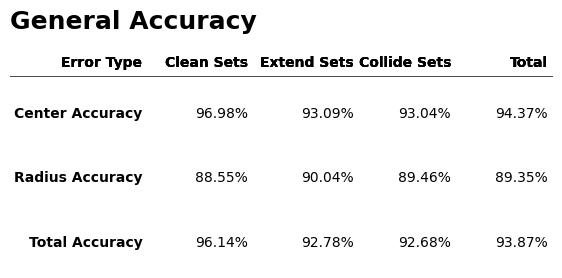

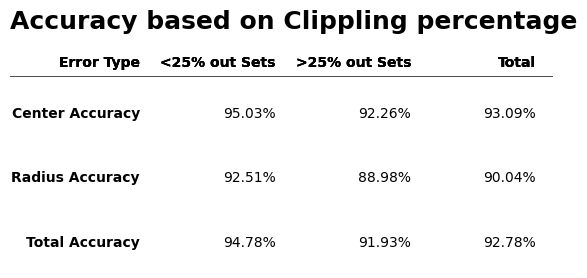

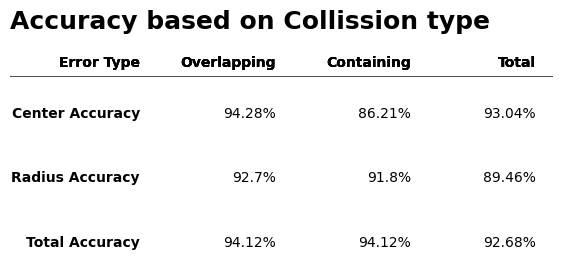

In [38]:
stats = extract_stats(results)
create_tables(stats)